In [459]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
import seaborn as sns

# Speed

## motor_speed v/s i_d

In [256]:
df = pd.read_csv("outlier_removed_data_up.csv")
df.sample(5)

,u_q,u_d,i_d,i_q,torque,motor_speed
72916,28.016668,-128.010986,-191.484467,83.050529,7.956464e+01,4499.959961
224756,53.191696,-35.561558,-23.014915,90.021858,6.749940e+01,1149.991089
371310,4.125620,1.463957,-2.000957,1.097451,4.979918e-01,99.977028
1137436,51.387393,-91.801797,-91.655684,205.877819,1.656803e+02,1512.104060
579035,1.354112,0.734012,-1.999765,1.097730,1.160842e-09,-0.005280


In [378]:
X = df[['i_d']]
X.sample(5)

,i_d
677823,-25.448559
210702,-9.126575
456501,-91.697739
441599,-1.999445
927717,-114.127150


In [379]:
X.describe()

,i_d
count,1.148857e+06
mean,-5.571650e+01
std,5.650869e+01
min,-1.985831e+02
25%,-9.457561e+01
50%,-4.351131e+01
75%,-2.001539e+00
max,5.189670e-02


In [380]:
y = df[['motor_speed']]
y.head()

,motor_speed
0,0.002866
1,0.000257
2,0.002355
3,0.006105
4,0.003133


In [381]:
y.describe()

,motor_speed
count,1.148857e+06
mean,2.138608e+03
std,1.904835e+03
min,-2.755491e+02
25%,2.499869e+02
50%,1.869884e+03
75%,3.787173e+03
max,6.000015e+03


In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [262]:
model = LinearRegression()

In [263]:
model.fit(X_train, y_train)

LinearRegression()

In [264]:
y_predicted = model.predict(X_test)

In [265]:
y_predicted

array([[2858.98873666],
       [1601.29177934],
       [ 788.95535943],
       ...,
       [ 714.30095476],
       [1853.02213542],
       [2411.34818072]])

In [266]:
r2 = r2_score(y_test, y_predicted)
r2

0.6201930170798609

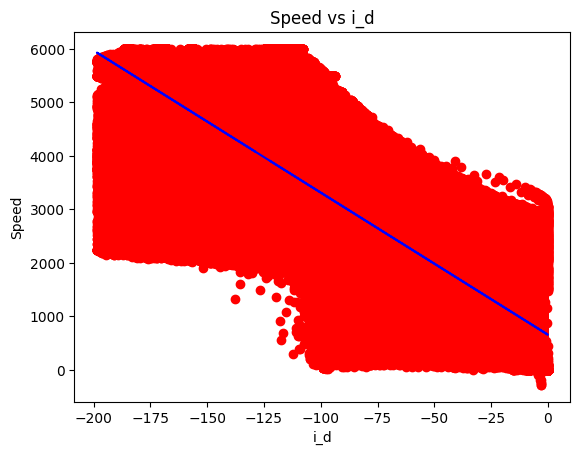

In [268]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.xlabel('i_d')
plt.ylabel('Speed')
plt.title('Speed vs i_d')
plt.show()

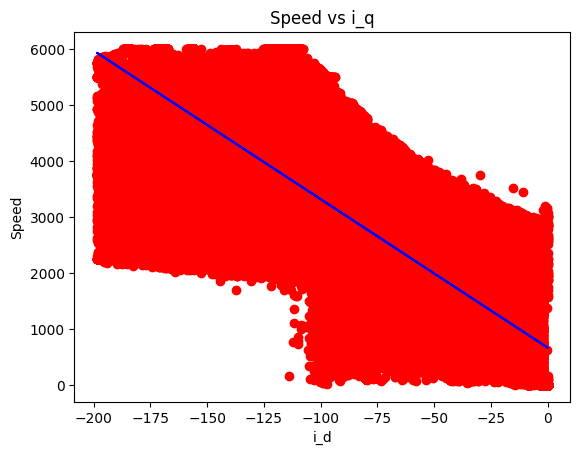

In [269]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.xlabel('i_d')
plt.ylabel('Speed')
plt.title('Speed vs i_q')
plt.show()

#### KNN

In [383]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [169]:
# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3) 

In [170]:
# Train the KNN regressor on the training data
knn_regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [171]:
# Make predictions on the test data
y_pred = knn_regressor.predict(X_test_scaled)

In [172]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 777288.5286036589
Mean Absolute Error: 592.7925325688412


In [173]:
# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.7862107582473443


#### Polynomial Regression

In [219]:
# Degree of the polynomial
degree = 6

In [220]:
# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

In [221]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=92)

In [222]:
# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [223]:
# Predict the target variable on both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [224]:
# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

In [225]:
# Predict the target variable
predicted_values = model.predict(X_poly)

In [226]:
# Print coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 0.00000000e+00 -2.16991741e+02 -9.50723745e+00 -1.79215068e-01
  -1.55060794e-03 -6.27022807e-06 -9.65837899e-09]]
Intercept: [76.48558526]


In [227]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)

Train MSE: 1202040.60097684
Test MSE: 1195662.3040349758
Train R^2: 0.6685271786624618
Test R^2: 0.6712073704441293


#### XGBoost

In [248]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [249]:
# Step 2: Create an XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Specify the objective for regression tasks
    learning_rate=0.8,             # Step size shrinkage used in updates to prevent overfitting
    n_estimators=100,              # Number of boosting rounds (trees)
    max_depth=6,                   # Maximum depth of each tree
    subsample=0.8,                 # Fraction of samples used for fitting each tree
    colsample_bytree=0.8,          # Fraction of features used for fitting each tree
    random_state=42                # For reproducibility
)

In [250]:
# Step 3: Fit the model to the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.8, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [252]:
# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

In [253]:
#Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 612490.0086252525
R-squared: 0.8315377498748102


#### PCA

In [233]:
# Step 1: Standardize the data
X_std = (X - X.mean()) / X.std()

In [234]:
# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)
cov_matrix

array(1.)

In [235]:
cov_matrix = X_std.cov()
cov_matrix

,i_d
i_d,1.0


In [236]:
# Step 3: Compute eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [237]:
# Step 4: Select the number of principal components
# In this example, let's use all principal components (equivalent to not performing dimensionality reduction)
n_components = len(eigenvectors)
n_components

1

In [238]:
# Step 5: Project the data onto the new feature space
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)
X_pca

array([[-0.98605928],
       [-0.9859918 ],
       [-0.9860039 ],
       ...,
       [-0.95060124],
       [-0.95057062],
       [-0.95057428]])

In [239]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [240]:
# Step 7: Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [241]:
# Step 8: Make predictions
y_pred = regressor.predict(X_test)

In [242]:
# Step 9: Calculate R-squared
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r_squared = regressor.score(X_test, y_test)
print(f"R-squared: {r_squared}")

Mean Squared Error: 1380890.8647000364
R-squared: 0.6201930170798611


#### L1 and L2 Regularization

In [243]:
lasso_reg = linear_model.Lasso(alpha=10, max_iter=500, tol=0.0002)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=10, max_iter=500, tol=0.0002)

In [244]:
lasso_reg.score(X_test, y_test)

0.6201534790579268

In [245]:
ridge_reg= Ridge(alpha=30, max_iter=60, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=30, max_iter=60, tol=0.1)

In [246]:
ridge_reg.score(X_test, y_test)

0.6201929577242804

# Torque

## torque v/s i_q

In [450]:
X = df[['i_q']]
y  = df[['torque']]

In [451]:
X

,i_q
0,0.000328
1,-0.000785
2,0.000386
3,0.002046
4,0.037184
...,...
1148852,1.097528
1148853,1.097569
1148854,1.098765
1148855,1.095696


In [454]:
y

,torque
0,1.871008e-01
1,2.454175e-01
2,1.766153e-01
3,2.383027e-01
4,2.081967e-01
...,...
1148852,-8.116730e-60
1148853,-5.815891e-60
1148854,-4.167268e-60
1148855,-2.985978e-60


In [452]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=520)

In [453]:
# Assuming you have your data stored in X (features) and y (target)

max_r2_score = -1  # Initialize with a very low value
best_random_state = None

for random_state in range(500, 1000):  # Loop through random states from 0 to 99
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2_score = model.score(X_test, y_test)
    
    if r2_score > max_r2_score:
        max_r2_score = r2_score
        best_random_state = random_state

print(f"Best R2 score: {max_r2_score:.4f} achieved with random state: {best_random_state}")

Best R2 score: 0.9922 achieved with random state: 520


In [455]:
model = LinearRegression()

In [456]:
model.fit(X_train, y_train)

LinearRegression()

In [457]:
y_predicted = model.predict(X_test)

In [460]:
r2 = r2_score(y_test, y_predicted)
r2

0.9921072901387898

#### KNN

In [461]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [462]:
# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3) 

In [463]:
# Train the KNN regressor on the training data
knn_regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [464]:
# Make predictions on the test data
y_pred = knn_regressor.predict(X_test_scaled)

In [465]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 16.479457277296625
Mean Absolute Error: 1.7737490313240674


In [466]:
# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.9949623397869573


#### Polynomial Regression

In [539]:
# Degree of the polynomial
degree = 7

In [540]:
# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

In [541]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=92)

In [542]:
# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [543]:
# Predict the target variable on both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [544]:
# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

In [545]:
# Predict the target variable
predicted_values = model.predict(X_poly)

In [546]:
# Print coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 0.00000000e+00  8.56477991e-01  1.32424693e-03 -9.55395016e-06
  -1.38763041e-07  6.00994210e-10  4.19130182e-12 -1.70974346e-14]]
Intercept: [-1.17337892]


In [547]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)

Train MSE: 22.310999340680123
Test MSE: 22.16227911642518
Train R^2: 0.9931985493598646
Test R^2: 0.9932214445066091


#### XGBoost

In [548]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [549]:
# Step 2: Create an XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Specify the objective for regression tasks
    learning_rate=0.8,             # Step size shrinkage used in updates to prevent overfitting
    n_estimators=100,              # Number of boosting rounds (trees)
    max_depth=6,                   # Maximum depth of each tree
    subsample=0.8,                 # Fraction of samples used for fitting each tree
    colsample_bytree=0.8,          # Fraction of features used for fitting each tree
    random_state=42                # For reproducibility
)

In [550]:
# Step 3: Fit the model to the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.8, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [551]:
# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

In [552]:
#Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 13.1187933306926
R-squared: 0.9960004905590868


#### PCA

In [553]:
# Step 1: Standardize the data
X_std = (X - X.mean()) / X.std()

In [554]:
# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)
cov_matrix

array(1.)

In [555]:
cov_matrix = X_std.cov()
cov_matrix

,i_q
i_q,1.0


In [556]:
# Step 3: Compute eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [557]:
# Step 4: Select the number of principal components
# In this example, let's use all principal components (equivalent to not performing dimensionality reduction)
n_components = len(eigenvectors)
n_components

1

In [558]:
# Step 5: Project the data onto the new feature space
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)
X_pca

array([[0.60562339],
       [0.60563925],
       [0.60562255],
       ...,
       [0.58997322],
       [0.59001694],
       [0.59000568]])

In [559]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [560]:
# Step 7: Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [561]:
# Step 8: Make predictions
y_pred = regressor.predict(X_test)

In [562]:
# Step 9: Calculate R-squared
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r_squared = regressor.score(X_test, y_test)
print(f"R-squared: {r_squared}")

Mean Squared Error: 25.965391834631014
R-squared: 0.9920839648005847


#### L1 and L2 Regularization

In [577]:
lasso_reg = linear_model.Lasso(alpha=10, max_iter=900, tol=0.000002)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=10, max_iter=900, tol=2e-06)

In [578]:
lasso_reg.score(X_test, y_test)

0.9616027873702805

In [573]:
ridge_reg= Ridge(alpha=70, max_iter=90, tol=0.01)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=70, max_iter=90, tol=0.01)

In [574]:
ridge_reg.score(X_test, y_test)

0.9920839783271602